# Research Question No. 4
What is the comparative performance of learning algorithms in long-lived bug prediction in FLOSS project? This research question aims to compare the accuracy of the long-lived bug prediction made by different classification algorithms. Here the algorithm with the best prediction capabilities is best fit in terms of balanced accuracy.

# 1. Setup environment.

In [ ]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import os 
import pandas as pd
import seaborn as sns 
from scipy.stats import friedmanchisquare
from scipy.stats import kruskal

# Setup Matplotlib
#plt.rc('figure', figsize=(20, 20))
#plt.style.use('default')
#SMALL_SIZE = 12
#MEDIUM_SIZE = 10
#BIGGER_SIZE = 12

#plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
#plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
#plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
#plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
#plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
#plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
#plt.rc('figure', titlesize=SMALL_SIZE)  # fontsize of the figure title
%matplotlib inline 

# Setup Seaborn
#sns.set_context("paper")
#sns.set_style("ticks")


pd.set_option('display.max_columns', None)

data_evaluation_path  = "../../data/processed/20200516212507-long-lived-bug-prediction-w-dnn-results.csv"
print("Setup complete")

Setup complete


# 2. Load data.

In [2]:
!echo "\nHeader of metrics file $data_results_path"
!head -n 2 $data_evaluation_path

!echo "\nNumber of lines in the file $data_results_path"
!wc -l $data_evaluation_path


\nHeader of metrics file 
#,project,feature,classifier,balancing,resampling,metric,threshold,terms,train_size,train_size_class_0,train_size_class_1,val_size,val_size_class_0,val_size_class_1,test_size,test_size_class_0,test_size_class_1,loss,tp,fp,tn,fn,accuracy,precision,recall,auc,sensitivity,specificity,balanced_acc,fmeasure,epochs
0,eclipse,long_description,lstm+emb,smote,-,val_accuracy,8,100,5880,2940,2940,1470,735,735,2444,1225,1219,0.6905812621116638,1292.0,1152.0,1292.0,1152.0,0.5286415815353394,0.5286415815353394,0.5286415815353394,0.5441259145736694,0.5286415711947627,0.5286415711947627,0.5286065861947732,0.5286415815353394,200
\nNumber of lines in the file 
21 ../../data/processed/20200516212507-long-lived-bug-prediction-w-dnn-results.csv


In [3]:
# read metrics data.
data_evaluation = pd.read_csv(data_evaluation_path, sep=',', decimal='.')
rows_and_cols = data_evaluation.shape
print(f"There are {rows_and_cols[0]} rows and {rows_and_cols[1]} columns in {data_evaluation_path}.\n")

There are 20 rows and 32 columns in ../../data/processed/20200516212507-long-lived-bug-prediction-w-dnn-results.csv.



# 3. First Experiment

## 3.1 Review the data

### Best Balanced Accuracy Scores

In [5]:
data_evaluation.sort_values('balanced_acc', ascending=False).head()

,#,project,feature,classifier,balancing,resampling,metric,threshold,terms,train_size,train_size_class_0,train_size_class_1,val_size,val_size_class_0,val_size_class_1,test_size,test_size_class_0,test_size_class_1,loss,tp,fp,tn,fn,accuracy,precision,recall,auc,sensitivity,specificity,balanced_acc,fmeasure,epochs
2,2,eclipse,long_description,lstm+emb,smote,-,val_accuracy,8,200,5880,2940,2940,1470,735,735,2444,1225,1219,0.691510,1322.0,1122.0,1322.0,1122.0,0.540917,0.540917,0.540917,0.546239,0.540917,0.540917,0.540888,0.540917,200
4,4,eclipse,long_description,lstm+emb,smote,-,val_accuracy,8,300,5880,2940,2940,1470,735,735,2444,1225,1219,0.690039,1315.0,1129.0,1315.0,1129.0,0.538052,0.538052,0.538052,0.549142,0.538052,0.538052,0.538137,0.538052,200
8,8,eclipse,long_description,lstm+emb,smote,-,val_accuracy,63,250,8802,4401,4401,2200,1100,1100,2444,1833,611,3.373760,1027.0,1417.0,1027.0,1417.0,0.420213,0.420213,0.420213,0.330910,0.420213,0.420213,0.533824,0.420213,200
3,3,eclipse,long_description,lstm+emb,smote,-,val_accuracy,8,250,5880,2940,2940,1470,735,735,2444,1225,1219,0.691460,1303.0,1141.0,1303.0,1141.0,0.533142,0.533142,0.533142,0.545663,0.533142,0.533142,0.533147,0.533142,200
7,7,eclipse,long_description,lstm+emb,smote,-,val_accuracy,63,200,8802,4401,4401,2200,1100,1100,2444,1833,611,3.216378,1056.0,1388.0,1056.0,1388.0,0.432079,0.432079,0.432079,0.340089,0.432079,0.432079,0.532460,0.432079,200


In [ ]:
#data_results[['feature', 'classifier', 'balancing', 'metric', 'sensitivity', 'specificity', 'balanced_acc']].sort_values('balanced_acc', ascending=False).head(10).to_latex('rq3e1_eclipse_metrics.tex')

### Best Sensitivity Scores

In [ ]:
data_evaluation.sort_values('sensitivity', ascending=False).head()

#### Legenda:
* **Sensitivity:** corresponde à taxa de acerto na classe positiva. Também chamada de taxa de verdadeiros positivos: TP / ( TP + FN ).
* **Specificity:** corresponde à taxa de acerto na classe negativa: TN / ( TN + FP ).
* **Balanced Accuracy:** (Sensibilidade + Especificidade)/2.


## 3.2 Evaluation Metrics

### Balanced Accuracy
Accurácia balanceada: (sensitivity + specificity)/2

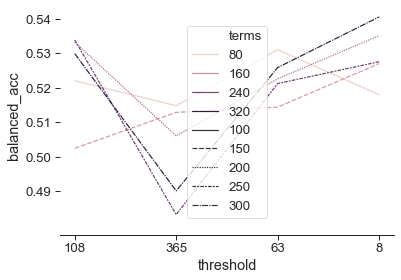

In [38]:
sns.set_context('paper', font_scale = 1.5)
sns.set_style("ticks", {'axes.grid' : False})
data_evaluation.threshold = data_evaluation['threshold'].astype(str)
data_evaluation.terms = data_evaluation['terms'].astype(str)

#g = sns.catplot(data=data_evaluation, x="threshold", y="balanced_acc"
#                , hue="terms", kind="point", height=6, aspect=2)
sns.lineplot(x='threshold', y='balanced_acc', data=data_evaluation, hue='terms', style='terms')

sns.despine(left=True, offset=10)

## 3.3 Statistical Test

### Balanced Accuracy 

In [ ]:
# read data per classifier
knn = e1_metrics_data[e1_metrics_data['classifier'] == 'knn'].balanced_acc
nb  = e1_metrics_data[e1_metrics_data['classifier'] == 'nb'].balanced_acc
nn  = e1_metrics_data[e1_metrics_data['classifier'] == 'nn'].balanced_acc
rf  = e1_metrics_data[e1_metrics_data['classifier'] == 'rf'].balanced_acc
svm = e1_metrics_data[e1_metrics_data['classifier'] == 'svm'].balanced_acc

# compare samples with Friedman Test
stat, p = kruskal(knn, nb, nn, rf, svm)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')


### Sensitivity

In [ ]:
# read data per classifier
knn = e1_metrics_data[e1_metrics_data['classifier'] == 'knn'].sensitivity
nb  = e1_metrics_data[e1_metrics_data['classifier'] == 'nb'].sensitivity
nn  = e1_metrics_data[e1_metrics_data['classifier'] == 'nn'].sensitivity
rf  = e1_metrics_data[e1_metrics_data['classifier'] == 'rf'].sensitivity
svm = e1_metrics_data[e1_metrics_data['classifier'] == 'svm'].sensitivity

# compare samples with Friedman Test
stat, p = kruskal(knn, nb, nn, rf, svm)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

## 3.4. Test results

In [ ]:
e1_tests_data = pd.read_csv(e1_tests_path)

In [ ]:
bug_reports_data = pd.read_csv(bug_reports_path)
test_e1_merged_data = pd.merge(
    bug_reports_data,
    e1_tests_data[['bug_id', 'long_lived', 'y_hat']],
    left_on='bug_id',
    right_on='bug_id',
    how='inner'
)

In [ ]:
correct_predicted_bugs = test_e1_merged_data.query('long_lived == "Y" and y_hat == "Y"')
correct_predicted_bugs.head()

# 4. Second Experiment (RQ4.2)

## 4.1 Parameters


| Parameter                  |         Value        |
|----------------------------|:--------------------:|
| Project                    |        Eclipse       |
| Algorithms                 |        NN |
| Metrics                    | Accuracy |
| Features                   | Long Description |
| Number of Terms            |        100, 150, 200, 250, 300       |
| Balancing                  |        Smote   |
| Resampling                 |        Repeated CV 5 x 2       |
| Threshold                  |        365       |








Every bug which its report have indicated that the number of days to resolve is less than or equal to **threshold fixed** was considered a **non-long lived bug** and that which the number of days to resolve is greater than this threshold was considered as a **long-live bug**. 

## 4.2 Review Data

In [ ]:
e2_metrics_data.sort_values('balanced_acc', ascending=False).head()

## 4.3 Evaluation Metrics

In [ ]:
from  matplotlib.ticker import PercentFormatter
sns.set_context("paper")
sns.set(style="whitegrid", font_scale=1.0)
e2_metrics_data_melted = e2_metrics_data[['n_term', 'sensitivity', 'specificity', 'balanced_acc']].melt(id_vars=['n_term']) 

g = sns.catplot(data=e2_metrics_data_melted
                , kind="point"
                , x="n_term"
                , y="value"
                , hue="variable"
                , saturation=.0
                , height=6
                , size=5
                , aspect=2
                , palette=["tab:green", "tab:blue", "tab:red"]
                , markers=["*", "o", "x"]
                #, linestyles=["-", "--", "dotted"]
                , legend_out=True)

(g.set_axis_labels("Number of Terms", "Score")
  .set_titles(" Balanced Accuracy: Neural Network")
  .set(ylim=(0, 1))
  .despine(left=True))

# Format y scale in percentage format. 
for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(1))

# Change and ajust legend. 
box = g.ax.get_position()
g.ax.set_position([box.x0, box.y0, box.width * 0.95, box.height]) # resize position
g._legend.set_title("Evaluating Metrics")
for t, l in zip(g._legend.texts, ['Sensitivity', 'Specificity', 'Balanced Accuracy']): t.set_text(l)

plt.show(g)
g.savefig(f"figures/rq4e2-eclipse-evaluation-metrics.pdf", format="pdf", dpi=600, bbox_inches='tight')

In [ ]:
from  matplotlib.ticker import PercentFormatter
import matplotlib.ticker as ticker

def plot_line(x_ticks, x_label, experiment, data, id_var):
    sns.set_context("paper")
    sns.set(style="ticks", color_codes=True)
    e2_metrics_data_melted = data[[id_var, 'sensitivity', 'specificity', 'balanced_acc']].melt(id_vars=[id_var]) 

    plt.plot(id_var, 'value', data=e2_metrics_data_melted[e2_metrics_data_melted.variable=='sensitivity'], label="Sensitivity", marker='*', markerfacecolor='tab:green', markersize=8, color='tab:green', linewidth=2)
    plt.plot(id_var, 'value', data=e2_metrics_data_melted[e2_metrics_data_melted.variable=='specificity'], label="Specificity", marker='o', markerfacecolor='tab:blue',  markersize=8, color='tab:blue', linewidth=2)
    plt.plot(id_var, 'value', data=e2_metrics_data_melted[e2_metrics_data_melted.variable=='balanced_acc'], label="Balanced Accuracy", marker='x',markerfacecolor='tab:red',   markersize=8, color='tab:red', linewidth=2)
    sns.despine(offset=5)

    ax = plt.axes()
    
    plt.xticks(x_ticks)
    plt.xlabel(x_label, fontsize=SMALL_SIZE)
    
    plt.yticks(fontsize=SMALL_SIZE)
    plt.ylabel('Score', fontsize=SMALL_SIZE)
    plt.ylim(0, 1)
    plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])

    plt.title("Eclipse: Evaluation Metrics", fontsize=SMALL_SIZE)
    plt.legend()
    plt.savefig(f"figures/rq4e{experiment}-eclipse-evaluation-metrics.pdf", format="pdf", dpi=600, bbox_inches='tight')

In [ ]:
plot_line([100, 150, 200, 250, 300], "Number of Terms", "2", e2_metrics_data, "n_term")

## 4.4 Test Results

In [ ]:
e2_tests_data = pd.read_csv(e2_tests_path)
bug_reports_data = pd.read_csv(bug_reports_path)
test_e2_merged_data = pd.merge(
    bug_reports_data,
    e2_tests_data[['bug_id', 'long_lived', 'y_hat']],
    left_on='bug_id',
    right_on='bug_id',
    how='inner'
)
correct_predicted_bugs = test_e2_merged_data.query('long_lived == "Y" and y_hat == "Y"')
correct_predicted_bugs.head()

# 5. Third Experiment (RQ4.3)

## 5.1 Parameters

| Parameter                  |         Value        |
|----------------------------|:--------------------:|
| Project                    |        Eclipse       |
| Algorithms                 |        NN |
| Metrics                    | Accuracy |
| Features                   | Long Description |
| Number of Terms            |        100       |
| Balancing                  |        Smote   |
| Resampling                 |        Repeated CV 5 x 2       |
| Threshold                  |        1, 8, 63, 365       |








Every bug which its report have indicated that the number of days to resolve is less than or equal to **threshold fixed** was considered a **non-long lived bug** and that which the number of days to resolve is greater than this threshold was considered as a **long-live bug**. 

## 5.2 Review Data

In [ ]:
e3_metrics_data.sort_values('balanced_acc', ascending=False).head()

## 5.3 Evaluation Metrics

In [ ]:
plot_line([8, 63, 108, 365], "Bug Fixing Time Threshold", "3", e3_metrics_data, "threshold")

## 5.4 Tests Results

In [ ]:
e3_tests_data = pd.read_csv(e3_tests_path)
bug_reports_data = pd.read_csv(bug_reports_path)
test_e3_merged_data = pd.merge(
    bug_reports_data,
    e2_tests_data[['bug_id', 'long_lived', 'y_hat']],
    left_on='bug_id',
    right_on='bug_id',
    how='inner'
)
correct_predicted_bugs = test_e3_merged_data.query('long_lived == "Y" and y_hat == "Y"')
correct_predicted_bugs.head()

# 6. Fourth Experiment

## 6.1 Parameters

| Parameter                  |         Value        |
|----------------------------|:--------------------:|
| Project                    |        Eclipse, Freedesktop, Gcc, Gnome, Mozilla, WineHQ       |
| Algorithms                 |        NN |
| Metrics                    | Accuracy |
| Features                   | Long Description |
| Number of Terms            |        100       |
| Balancing                  |        Smote   |
| Resampling                 |        Repeated CV 5 x 2       |
| Threshold                  |        365       |








Every bug which its report have indicated that the number of days to resolve is less than or equal to **threshold fixed** was considered a **non-long lived bug** and that which the number of days to resolve is greater than this threshold was considered as a **long-live bug**.

## 6.2 Review Data

In [ ]:
e4_metrics_data.sort_values('balanced_acc', ascending=False).head(6)

## 6.3 Evaluation Metrics

In [ ]:
sns.despine(offset=5)
sns.set(style="whitegrid")
e4_metrics_data_melted = e4_metrics_data[['project', 'sensitivity', 'specificity', 'balanced_acc']].melt(id_vars=['project']) 
g = sns.catplot(data=e4_metrics_data_melted
                , kind="bar"
                , x="project"
                , y="value"
                , hue="variable"
                #, saturation=.5
                , height=6
                , aspect=2
                , palette=["tab:green", "tab:blue", "tab:red"])
(g.set_axis_labels("", "")
  .set_titles(" GCC: Neural Network Performance")
  .set(ylim=(0,1))
  .despine(left=True))

# Format y scale in percentage format. 
for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(1))

# Change and ajust legend. 
box = g.ax.get_position()
g.ax.set_position([box.x0, box.y0, box.width * 0.95, box.height]) # resize position
g._legend.set_title("Evaluating Metrics")
for t, l in zip(g._legend.texts, ['Sensitivity', 'Specificity', 'Balanced Accuracy']): t.set_text(l)

plt.show(g)
plt.savefig("figures/r4e4_performace_algorithms_on_eclipse_dataset.pdf", format="pdf", dpi=600, bbox_inches='tight')

In [ ]:
from pandas import DataFrame

metrics = {'dataset': ['Eclipse', 'Freedesktop', 'Gnome', 'Mozilla', 'Gcc', 'WineHQ'],
        '% of Long-Lived Bugs': [7.7, 13.6, 14.4, 18.1, 29.2, 40.7],
        'Balanced Accuracy (%)': [54.21, 55.44, 59.48, 61.84, 70.77, 56.46]}

df = DataFrame(metrics)

print (df) 

In [ ]:
plt.rc('figure', figsize=(20, 20))
plt.style.use('default')

x=df['% of Long-Lived Bugs']
y=df['Balanced Accuracy (%)']

plt.scatter(x, y, s=100, color=['tab:blue', 'tab:pink', 'tab:green', 'tab:purple', 'tab:orange', 'tab:red'])
plt.xlim(0,50)
plt.ylim(50, 75)
plt.text(6, 55.5, 'Eclipse')
plt.text(10, 56.5, 'Freedesktop')
plt.text(12, 60.5, 'Gnome')
plt.text(16, 63.0, 'Mozilla')
plt.text(27.5, 72, 'GCC')
plt.text(38.5, 57.5, 'WineHQ')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.5)
plt.xlabel('% of Long-Lived Bugs')
plt.ylabel('Balance Accuracy (%)')

sns.despine(offset=5, trim=True)


## 6.4 Tests Results

In [ ]:
e4_tests_data = pd.read_csv(e4_tests_path)
bug_reports_data = pd.read_csv(bug_reports_gcc_path)
test_e4_merged_data = pd.merge(
    bug_reports_data,
    e4_tests_data[['bug_id', 'long_lived', 'y_hat']],
    left_on='bug_id',
    right_on='bug_id',
    how='inner'
)
correct_predicted_bugs = test_e4_merged_data.query('long_lived == "Y" and y_hat == "N"')
#correct_predicted_bugs.head()
correct_predicted_bugs.groupby('long_lived')['long_lived'].agg(['count'])